In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
#reading data
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.shape

(1014, 7)

In [ ]:
#to check the number of missing values in each columngives you pandas series of column names along with the sum of missing values in each column
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
#identify duplicates
data_dup = df.duplicated().any()
data_dup

True

In [ ]:
#remove duplicates
df = df.drop_duplicates()

In [ ]:
#now free of duplicates
data_dup = df.duplicated().any()
data_dup

False

In [ ]:
#encoding the categorical data
RiskLevel = {'low risk':1, 'mid risk':2, 'high risk':3}
#using map (mapping each category to the according number)
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [ ]:
#we want x to be all features except class
X = df.drop('RiskLevel',axis=1)
#only the class feature
y = df['RiskLevel']

In [ ]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70
674,15,100,60,6.0,98.0,80
703,15,100,49,7.6,98.0,77
704,12,100,50,6.0,98.0,70


In [ ]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      1.0
      ... 
673    2.0
674    1.0
703    1.0
704    2.0
705    1.0
Name: RiskLevel, Length: 452, dtype: float64

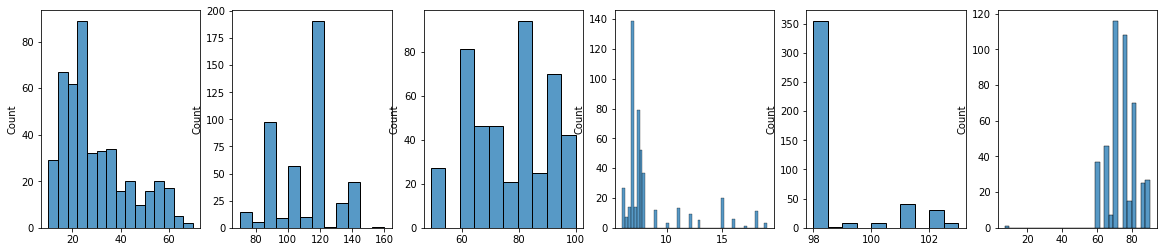

In [ ]:
#plotting
plt.figure(figsize=(20, 4))
for i in range(X.shape[1]):
    ax = plt.subplot(1, X.shape[1], i+1)
    sns.histplot(X.values[:, i], ax=ax)

In [ ]:
#shuffling and splitting data to test X and y (0.3) and train X and y (0.7)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)
y_test

425    3.0
39     1.0
492    2.0
484    1.0
192    3.0
      ... 
29     1.0
171    3.0
377    1.0
26     1.0
7      3.0
Name: RiskLevel, Length: 136, dtype: float64

In [ ]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('\n')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (316, 6)
Testing Shape x: (136, 6)


Training Shape y: (452, 6)
Testing Shape y: (452,)


In [ ]:
#normalizing features
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [ ]:
#performing Support Vector Classification (SVC)
from sklearn.svm import SVC

#SVM

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(scores)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test)))

[0.61538462 0.53846154 0.58888889 0.42222222 0.5       ]
Train accuracy: 0.7246835443037974
Test accuracy: 0.6544117647058824
[3. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 3. 1. 1. 1. 3. 1. 1. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 3. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 3. 2.
 1. 1. 3. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1.
 1. 1. 3. 3. 1. 3. 1. 1. 3. 3. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 3. 3. 1. 2.
 1. 2. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 1. 1. 3.]
CM: [[62  2  1]
 [30  2  7]
 [ 6  1 25]]
Accuracy: 65.44117647058823 %
              precision    recall  f1-score   support

         1.0       0.63      0.95      0.76        65
         2.0       0.40      0.05      0.09        39
         3.0       0.76      0.78      0.77        32

    accuracy                           0.65       136
   macro avg       0.60      0.60      0.54       136
weighted avg       0.60      0.65      0.57       136



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

#constructing KNN model
#choosing n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)
print("Train accuracy:",knn.score(X_train,y_train))
print("Test accuracy:",knn.score(X_test,y_test))

y_pred = knn.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, knn.predict(X_test)))

[0.7032967  0.62637363 0.63333333 0.52222222 0.54444444]
Train accuracy: 0.7436708860759493
Test accuracy: 0.6397058823529411
[3. 1. 2. 2. 2. 1. 3. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 2. 2.
 1. 1. 3. 1. 1. 2. 2. 1. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 2.
 2. 2. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 3.]
CM: [[60  5  0]
 [29  8  2]
 [10  3 19]]
Accuracy: 63.970588235294116 %
              precision    recall  f1-score   support

         1.0       0.61      0.92      0.73        65
         2.0       0.50      0.21      0.29        39
         3.0       0.90      0.59      0.72        32

    accuracy                           0.64       136
   macro avg       0.67      0.57      0.58       136
weighted avg       0.65      0.64      0.60       136



In [ ]:
#Decision Tree
from sklearn import tree

#Constructing tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Training Decision Tree on scaled training set
decision_tree.fit(X_train, y_train)
scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
print(scores)
print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

[0.68131868 0.6043956  0.64444444 0.35555556 0.56666667]
Train accuracy: 0.9430379746835443
Test accuracy: 0.6397058823529411
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 3.
 3. 1. 3. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 3. 2. 3.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 2. 3. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 3. 3. 1. 2.
 1. 1. 3. 1. 2. 2. 2. 1. 2. 3. 2. 1. 3. 2. 3. 1. 2. 1. 1. 1. 3. 3. 1. 2.
 3. 2. 1. 1. 2. 1. 3. 1. 3. 2. 1. 1. 1. 1. 1. 3.]
CM: [[51 12  2]
 [18 16  5]
 [ 3  9 20]]
Accuracy: 63.970588235294116 %
              precision    recall  f1-score   support

         1.0       0.71      0.78      0.74        65
         2.0       0.43      0.41      0.42        39
         3.0       0.74      0.62      0.68        32

    accuracy                           0.64       136
   macro avg       0.63      0.61      0.61       136
weighted avg       0.64      0.64      0.64       136



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)
scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(scores)
print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

[0.71428571 0.6043956  0.65555556 0.4        0.61111111]
Train accuracy: 0.9430379746835443
Test accuracy: 0.6397058823529411
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 3. 2. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3. 3. 2. 2.
 2. 1. 3. 1. 2. 3. 2. 1. 3. 1. 2. 1. 3. 2. 2. 1. 3. 1. 1. 1. 3. 3. 1. 2.
 3. 2. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 1. 1. 3.]
CM: [[53 10  2]
 [25 10  4]
 [ 4  4 24]]
Accuracy: 63.970588235294116 %
              precision    recall  f1-score   support

         1.0       0.65      0.82      0.72        65
         2.0       0.42      0.26      0.32        39
         3.0       0.80      0.75      0.77        32

    accuracy                           0.64       136
   macro avg       0.62      0.61      0.60       136
weighted avg       0.62      0.64      0.62       136



# Results:

data was standardized in preprocessing.

Random forest and SVM achieved the highest accuracies.